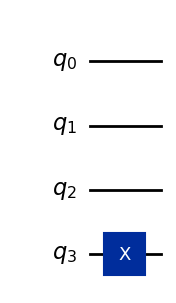

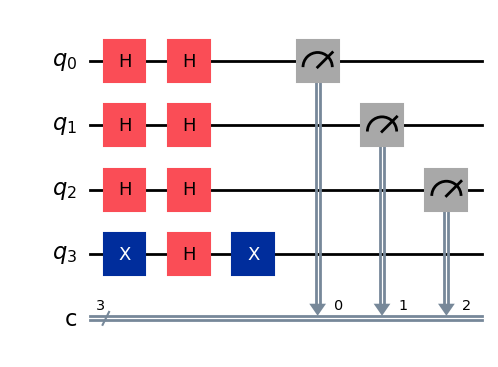

<IPython.core.display.Latex object>

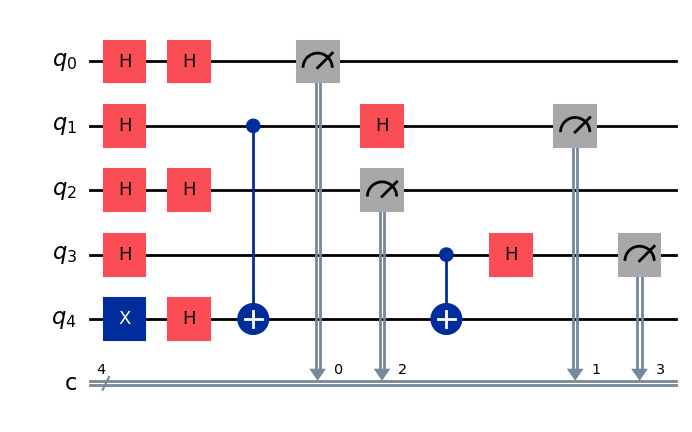

'1010 - 1010'

In [47]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
from IPython.display import display,Latex
from numpy import random
def djquery(nq):
    qc = QuantumCircuit(nq+1)
    if np.random.choice([0,1]):
        qc.x(nq)
    if np.random.choice([0,1]):
        return qc
    onstate = np.random.choice(
        range(2**nq),
        2**(nq-1),
        replace=False
    )
    def addcx(qc,bitstr):
        for qbit,bit in enumerate(reversed(bitstr)):
            if bit == "1":
                qc.x(qbit)
        return qc
    for state in onstate:
        qc.barrier()
        qc = addcx(qc,f"{state:0b}")
        qc.mcx(list(range(nq)),nq)
        qc = addcx(qc,f"{state:0b}")

    qc.barrier()

    return qc

def MakeCircuit(f:QuantumCircuit):
    n = f.num_qubits-1
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    qc.h(range(n+1))
    qc.compose(f,inplace=True)
    qc.h(range(n))
    qc.measure(range(n),range(n))
    display(qc.draw("mpl"))
    return qc

def djalgo(f:QuantumCircuit):
    qc = MakeCircuit(f)
    result = AerSimulator().run(qc,shots=1,memory=True).result()
    measure = result.get_memory()
    if "1" in measure[0]:
        return "Balanced"
    return "Constant"

f = djquery(3)
display(f.draw("mpl"))
display(Latex(f"{djalgo(f)}"))

def bvquery(s):
    qc = QuantumCircuit(len(s)+1)
    for index,bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index,len(s))
    return qc
def bvalgo(f:QuantumCircuit):
    qc = MakeCircuit(f)
    res = AerSimulator().run(qc,shots=1,memory=True).result()
    return res.get_memory()[0]
    
x = random.randint(0,16)
display(f"{bvalgo(bvquery(f"{x:4b}"))} - {x:04b}")